# Multiple Linear Regression Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("~/library/data/processed/borough-unemployment-and-business-data.csv")
df.drop("Unnamed: 0", axis=1,inplace=True)

In [3]:
df.drop("area", axis=1,inplace=True)
df.drop("year", axis=1,inplace=True)
df.drop('unemployment_rate', axis=1, inplace=True)
df.head()

,3_year_survival_number,3_year_survival_rate,number_of_jobs,job_density,NVQ4_rate,youth_unemployment_rate,no_qualif_rate,NVQ3_rate,NVQ2_rate,NVQ1_rate
0,455.0,54.5,54000,0.45,33.2,22.734367,8.6,13.7,16.3,14.3
1,1635.0,57.7,147000,0.62,57.3,9.944418,3.7,10.9,9.3,7.5
2,555.0,58.7,78000,0.53,29.6,10.870386,4.8,19.0,19.2,17.2
3,1085.0,56.7,115000,0.53,33.8,14.681718,8.2,14.8,11.4,9.2
4,990.0,62.7,119000,0.61,47.1,10.269752,5.4,17.5,12.8,10.5


# Final Results

The variation in registered youth unemployment rates in our sample can be better explained by a model based on qualification parameters than job availability parameters. Precisely, a model based on the rates of economically active people with qualifications higher or equal to NVQ4 and rates of economically active people with no qualifications yields an adjusted R2 coefficient of determination of R2=0.270 on the youth unemployment set and a normal R2 of 0.281. Both of these scores are lower for the job availability model. The model based on the 3 year survival rate of businesses and job density yields only an adjusted R2 coefficient of determination of 0.255 on youth unemployment and an unadjusted R2 coefficient of determination of R2=0.243. The better scores of the qualifications based model over the job availability based one seem to be best explained by the most significant variables in the respective models. The no qualifications rate, which seem to be most significant in the qualifications model, has a higher correlation coefficient with youth unemployment (|0.53|) than the 3 year survival rate (|0.43|), while the other independent variables have much lower correlation coefficients with youth unemployment.
However, a comprised model with all independent variables from both models combined yields only an adjusted R2 of 0.357. The low coefficients of determination of all discussed models hence hints to the overall incompleteness of the selected factors to offer a full explanation of the variance in youth unemployment over time and space.  

Limitations:
There are some relevant limitations to our analysis. First of all, autocorrelation in residuals cannot be ruled out. The Durban-Watson-Test score of under 2 indicates that it is quite likely that there is positive autocorrelation in residuals in all linear models that were performed. Our R2-scores should hence be read with caution. 
Secondly, we can certainly not guarantee that we included all relevant variables that determine job availability or qualification levels. Our selection of factors is a result of the factors that were identified as relevant in previous literature. Hence, a different analysis using other parameters might come to a different conclusion concerning which of the two influences youth unemployment more.  

In [4]:
X=df.drop(['youth_unemployment_rate'],axis=1) #job availaibility factors set
X.drop('NVQ4_rate', axis=1, inplace=True)
X.drop('no_qualif_rate', axis=1, inplace=True)
X.drop('NVQ3_rate', axis=1, inplace=True)
X.drop('NVQ2_rate', axis=1, inplace=True)
X.drop('NVQ1_rate', axis=1, inplace=True)
X.drop('number_of_jobs', axis=1, inplace=True) #to prevent multicollinearity with job density
X.drop('3_year_survival_number', axis=1, inplace=True) #to prevent multicollinearity with job density

y=df.youth_unemployment_rate #youth unemployment set

Z=df.drop(['youth_unemployment_rate'],axis=1)
Z.drop('3_year_survival_number', axis=1, inplace=True) #qualifications factors set
Z.drop('3_year_survival_rate', axis=1, inplace=True)
Z.drop('number_of_jobs', axis=1, inplace=True)
Z.drop('job_density', axis=1, inplace=True)
Z.drop('NVQ3_rate', axis=1, inplace=True) #to prevent multicollinearity with NVQ4
Z.drop('NVQ2_rate', axis=1, inplace=True) #to prevent multicollinearity with NVQ4
Z.drop('NVQ1_rate', axis=1, inplace=True) #to prevent multicollinearity with NVQ4

In [5]:
#job availability
X = sm.add_constant(X)
model1 = sm.OLS(endog = y, exog = X).fit()
y_pred1 = model1.predict(X)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.255
Model:                                 OLS   Adj. R-squared:                  0.243
Method:                      Least Squares   F-statistic:                     21.35
Date:                     Tue, 14 Jan 2020   Prob (F-statistic):           1.05e-08
Time:                             11:57:55   Log-Likelihood:                -356.75
No. Observations:                      128   AIC:                             719.5
Df Residuals:                          125   BIC:                             728.0
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   47.0709      5.879      8.007      0.000      35.436      58.706
3_year_survival_rate    -0.6136      0.098     -6.288      0.000      -0.807      -0.420
job_density             -1.7543      0.507     -3.460      0.001      -2.758      -0.751
==============================================================================
Omnibus:                        5.708   Durbin-Watson:                   1.185
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                5.729
Skew:                           0.517   Prob(JB):                       0.0570
Kurtosis:                       2.925   Cond. No.                         985.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, '3 year survival rate of businesses')

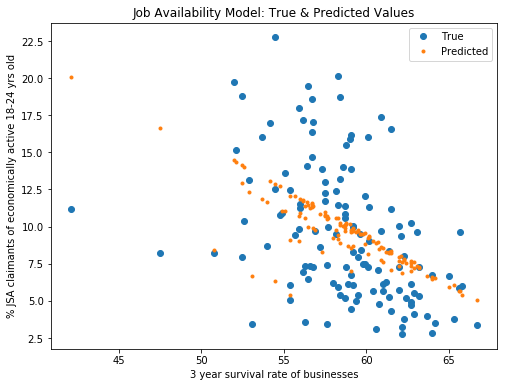

In [6]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X['3_year_survival_rate'], y, 'o', label="True")
ax.plot(X['3_year_survival_rate'], y_pred1, '.', label="Predicted")
ax.legend(loc='best')

plt.title("Job Availability Model: True & Predicted Values")
plt.ylabel("""% JSA claimants of economically active 18-24 yrs old""")
plt.xlabel("""3 year survival rate of businesses""")

Text(0.5, 0, 'Job density [Jobs/Resident]')

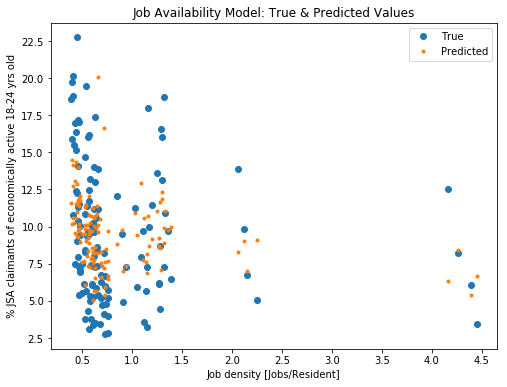

In [7]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X['job_density'], y, 'o', label="True")
ax.plot(X['job_density'], y_pred1, '.', label="Predicted")
ax.legend(loc='best')

plt.title("Job Availability Model: True & Predicted Values")
plt.ylabel("""% JSA claimants of economically active 18-24 yrs old""")
plt.xlabel("""Job density [Jobs/Resident]""")

In [8]:
#qualifications
Z = sm.add_constant(Z)
model2 = sm.OLS(endog = y, exog = Z).fit()
y_pred2 = model2.predict(Z)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.281
Model:                                 OLS   Adj. R-squared:                  0.270
Method:                      Least Squares   F-statistic:                     24.43
Date:                     Tue, 14 Jan 2020   Prob (F-statistic):           1.10e-09
Time:                             11:57:57   Log-Likelihood:                -354.44
No. Observations:                      128   AIC:                             714.9
Df Residuals:                          125   BIC:                             723.4
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.8738      2.298      0.815      0.416      -2.675       6.422
NVQ4_rate          0.0235      0.031      0.758      0.450      -0.038       0.085
no_qualif_rate     1.2388      0.187      6.612      0.000       0.868       1.610
==============================================================================
Omnibus:                        8.251   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.152
Skew:                           0.608   Prob(JB):                       0.0170
Kurtosis:                       3.222   Cond. No.                         374.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, '% economically active with NVQ4')

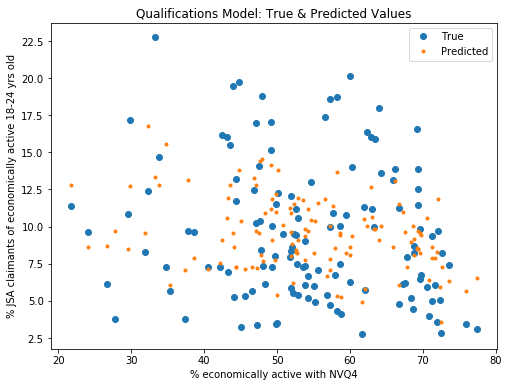

In [9]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(Z['NVQ4_rate'], y, 'o', label="True")
ax.plot(Z['NVQ4_rate'], y_pred2, '.', label="Predicted")
ax.legend(loc='best')
plt.title("Qualifications Model: True & Predicted Values")
plt.ylabel("""% JSA claimants of economically active 18-24 yrs old""")
plt.xlabel("""% economically active with NVQ4""")

Text(0.5, 0, '% economically active with no qualifications')

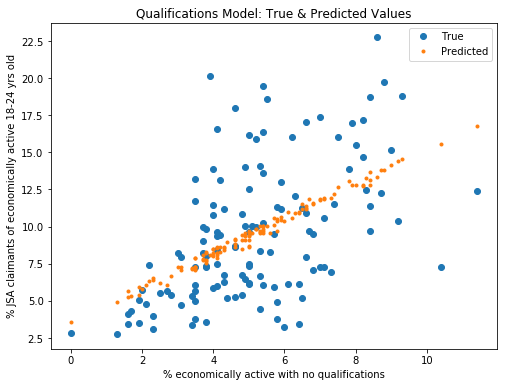

In [35]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(Z['no_qualif_rate'], y, 'o', label="True")
ax.plot(Z['no_qualif_rate'], y_pred2, '.', label="Predicted")
ax.legend(loc='best')
plt.title("Qualifications Model: True & Predicted Values")
plt.ylabel("""% JSA claimants of economically active 18-24 yrs old""")
plt.xlabel("""% economically active with no qualifications""")

In [18]:
#combined model
df_final = df.drop('number_of_jobs', axis=1) #to prevent multicollinearity with job density
df_final.drop('3_year_survival_number', axis=1, inplace=True)
df_final.drop('NVQ3_rate', axis=1, inplace=True) #to prevent multicollinearity with NVQ4
df_final.drop('NVQ2_rate', axis=1, inplace=True) #to prevent multicollinearity with NVQ4
df_final.drop('NVQ1_rate', axis=1, inplace=True) #to prevent multicollinearity with NVQ4
df_final = df_final[['youth_unemployment_rate', '3_year_survival_rate', 'job_density', 'NVQ4_rate', 'no_qualif_rate']]

In [12]:
y = df_final['youth_unemployment_rate']
df_final.drop('youth_unemployment_rate', axis=1, inplace=True)

df_final = sm.add_constant(df_final)
model3 = sm.OLS(endog = y, exog = df_final).fit()
y_pred3 = model3.predict(df_final)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.378
Model:                                 OLS   Adj. R-squared:                  0.357
Method:                      Least Squares   F-statistic:                     18.66
Date:                     Tue, 14 Jan 2020   Prob (F-statistic):           5.18e-12
Time:                             11:57:59   Log-Likelihood:                -345.20
No. Observations:                      128   AIC:                             700.4
Df Residuals:                          123   BIC:                             714.7
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   32.1606      7.392      4.351      0.000      17.529      46.792
3_year_survival_rate    -0.4382      0.102     -4.314      0.000      -0.639      -0.237
job_density             -0.9033      0.523     -1.729      0.086      -1.938       0.131
NVQ4_rate               -0.0087      0.034     -0.259      0.796      -0.075       0.058
no_qualif_rate           0.8462      0.198      4.282      0.000       0.455       1.237
==============================================================================
Omnibus:                        9.154   Durbin-Watson:                   1.156
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.078
Skew:                           0.630   Prob(JB):                       0.0107
Kurtosis:                       3.336   Cond. No.                     1.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, '% JSA claimants of economically active 18-24 yrs old')

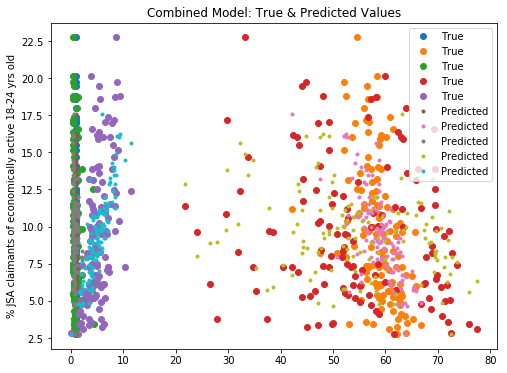

In [13]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(df_final, y, 'o', label="True")
ax.plot(df_final, y_pred3, '.', label="Predicted")
ax.legend(loc='best')
plt.title("Combined Model: True & Predicted Values")
plt.ylabel("""% JSA claimants of economically active 18-24 yrs old""")

## Without outliers

In [42]:
df = pd.read_csv("~/library/data/processed/processed_youth_data_labelled-1.csv")
df.drop("Unnamed: 0", axis=1,inplace=True)

In [44]:
df.drop("area", axis=1,inplace=True)
df.drop("year", axis=1,inplace=True)
df.drop('unemployment_rate', axis=1, inplace=True)
df.head()

,3_year_survival_number,3_year_survival_rate,number_of_jobs,job_density,NVQ4_rate,youth_unemployment_rate,no_qualif_rate,NVQ3_rate,NVQ2_rate,NVQ1_rate,group_qualif,group_econ
0,455.0,54.5,54000,0.45,33.2,22.734367,8.6,13.7,16.3,14.3,2,0
1,1635.0,57.7,147000,0.62,57.3,9.944418,3.7,10.9,9.3,7.5,0,1
2,555.0,58.7,78000,0.53,29.6,10.870386,4.8,19.0,19.2,17.2,1,0
3,1085.0,56.7,115000,0.53,33.8,14.681718,8.2,14.8,11.4,9.2,2,0
4,990.0,62.7,119000,0.61,47.1,10.269752,5.4,17.5,12.8,10.5,0,1


In [45]:
df = df[df['group_econ'].isin([0,1])]

In [46]:
# get z scores
z = np.abs(stats.zscore(df['job_density']))

# set a threshold of 2 standard deviations
threshold = 2 * z.std()

df= df[z<= threshold]

In [47]:
df = df.drop('group_qualif',axis=1)
df.drop('group_econ', axis=1, inplace=True)

X=df.drop(['youth_unemployment_rate'],axis=1) #job availaibility factors set
X.drop('NVQ4_rate', axis=1, inplace=True)
X.drop('no_qualif_rate', axis=1, inplace=True)
X.drop('NVQ3_rate', axis=1, inplace=True)
X.drop('NVQ2_rate', axis=1, inplace=True)
X.drop('NVQ1_rate', axis=1, inplace=True)
X.drop('number_of_jobs', axis=1, inplace=True) #to prevent multicollinearity with job density
X.drop('3_year_survival_number', axis=1, inplace=True) #to prevent multicollinearity with job density

y=df.youth_unemployment_rate #youth unemployment set

In [48]:
#job availability
X = sm.add_constant(X)
model1 = sm.OLS(endog = y, exog = X).fit()
y_pred1 = model1.predict(X)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.323
Model:                                 OLS   Adj. R-squared:                  0.311
Method:                      Least Squares   F-statistic:                     25.09
Date:                     Tue, 14 Jan 2020   Prob (F-statistic):           1.24e-09
Time:                             18:46:12   Log-Likelihood:                -297.03
No. Observations:                      108   AIC:                             600.1
Df Residuals:                          105   BIC:                             608.1
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   48.8411      5.888      8.295      0.000      37.166      60.516
3_year_survival_rate    -0.6056      0.099     -6.112      0.000      -0.802      -0.409
job_density             -5.4047      1.783     -3.032      0.003      -8.939      -1.870
==============================================================================
Omnibus:                        3.009   Durbin-Watson:                   1.240
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                3.015
Skew:                           0.391   Prob(JB):                        0.221
Kurtosis:                       2.761   Cond. No.                         946.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, '3 year survival rate of businesses')

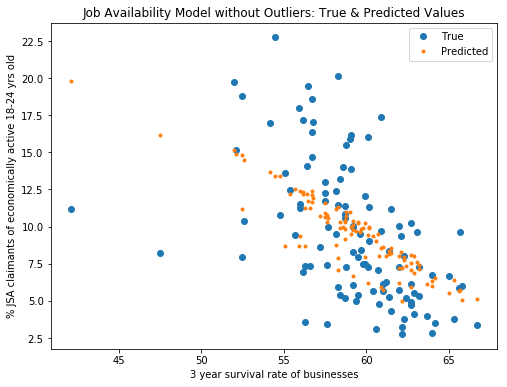

In [51]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X['3_year_survival_rate'], y, 'o', label="True")
ax.plot(X['3_year_survival_rate'], y_pred1, '.', label="Predicted")
ax.legend(loc='best')

plt.title("Job Availability Model without Outliers: True & Predicted Values")
plt.ylabel("""% JSA claimants of economically active 18-24 yrs old""")
plt.xlabel("""3 year survival rate of businesses""")

Text(0.5, 0, 'Job density [Jobs/Resident]')

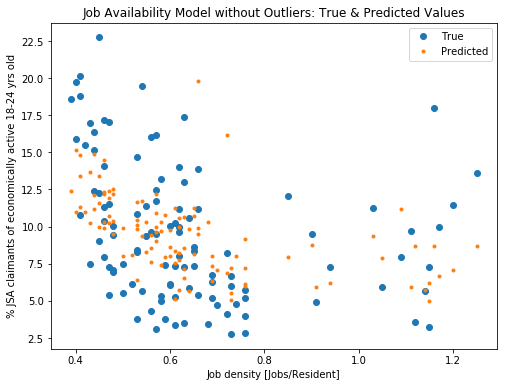

In [52]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X['job_density'], y, 'o', label="True")
ax.plot(X['job_density'], y_pred1, '.', label="Predicted")
ax.legend(loc='best')

plt.title("Job Availability Model without Outliers: True & Predicted Values")
plt.ylabel("""% JSA claimants of economically active 18-24 yrs old""")
plt.xlabel("""Job density [Jobs/Resident]""")

# Visualisations

Text(0.5, 1.0, 'Correlation in absolute values')

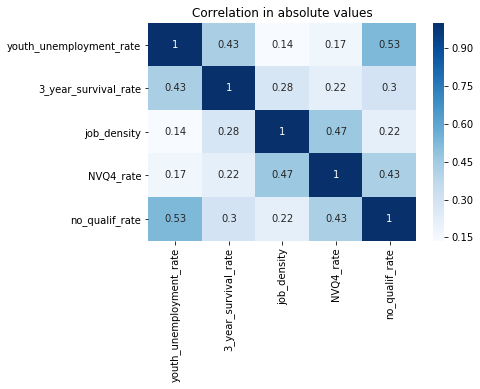

In [19]:
sns.heatmap(df_final.corr().abs(),annot=True, cmap='Blues')
plt.title("Correlation in absolute values")

AttributeError: 'PairGrid' object has no attribute 'p'

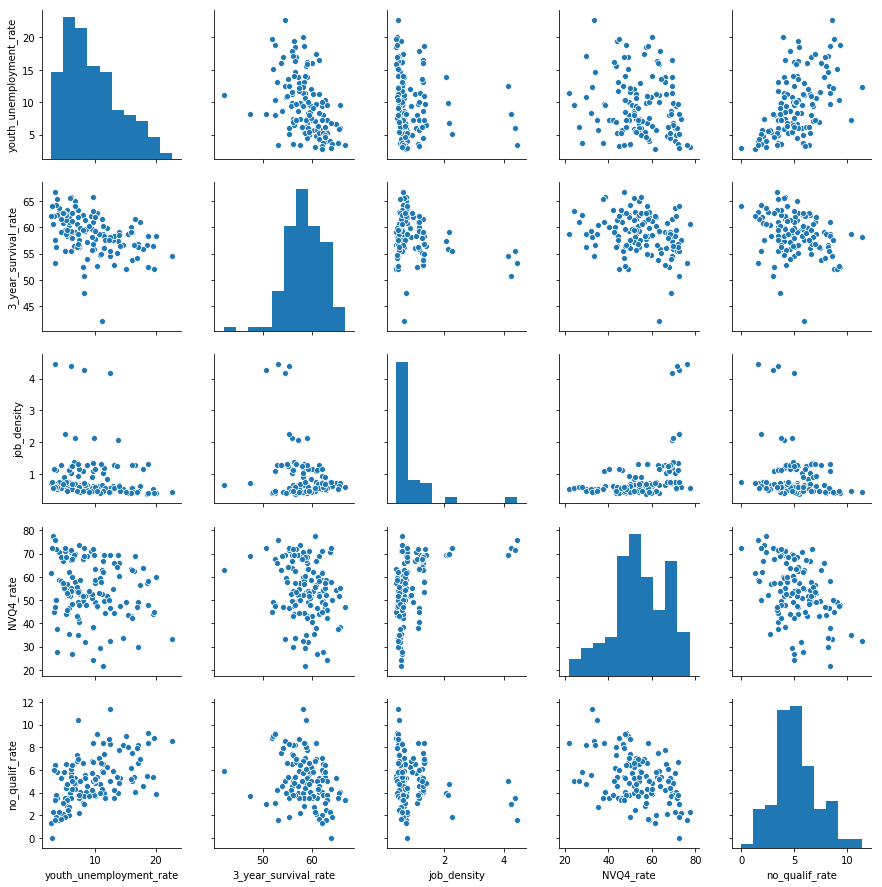

In [25]:
sns.pairplot(data=df_final)

### Testing the assumptions for a linear regression

Verifying assumptions:
1. Dependent and Independent variable must show a linear relationship
    1. check visually with pair plot
    2. if not, correct with allowing for polinomial regression line
2. No autocorrelation in residuals (difference btw. outcome and predicted…)
    1. Look at Durbin-Watson-Test in stats models summary: if 2 —> good
    2. if +/- —> centre independent variable by subtracting mean in lagged column
3. No Heteroskedacity (standard error along x axis is non-constant)
    1. check plot of residuals vs. fitted values (can also roughly estimate from the pair plot)
    2. if deviation from regression line increases over x  —> non-linear transformation of dependent variable
4. No Multicollinearity (= all predictor variables should be sufficiently independent from each other, otherwise p- and coefficient values cannot be trusted)
    1. check heatmap for correlation or calculate VIF
    2. if one variable with high multicollinearity —> remove it if you can (just don’t use it)
    3. (might be the case for number of jobs & job density)
5. Residuals must be normally distributed
    1. check histogram of residuals
    
reference: https://github.com/fahadanwar10/LinearRegression/blob/master/media-sales-linear-regression-verify-assumptions.ipynb

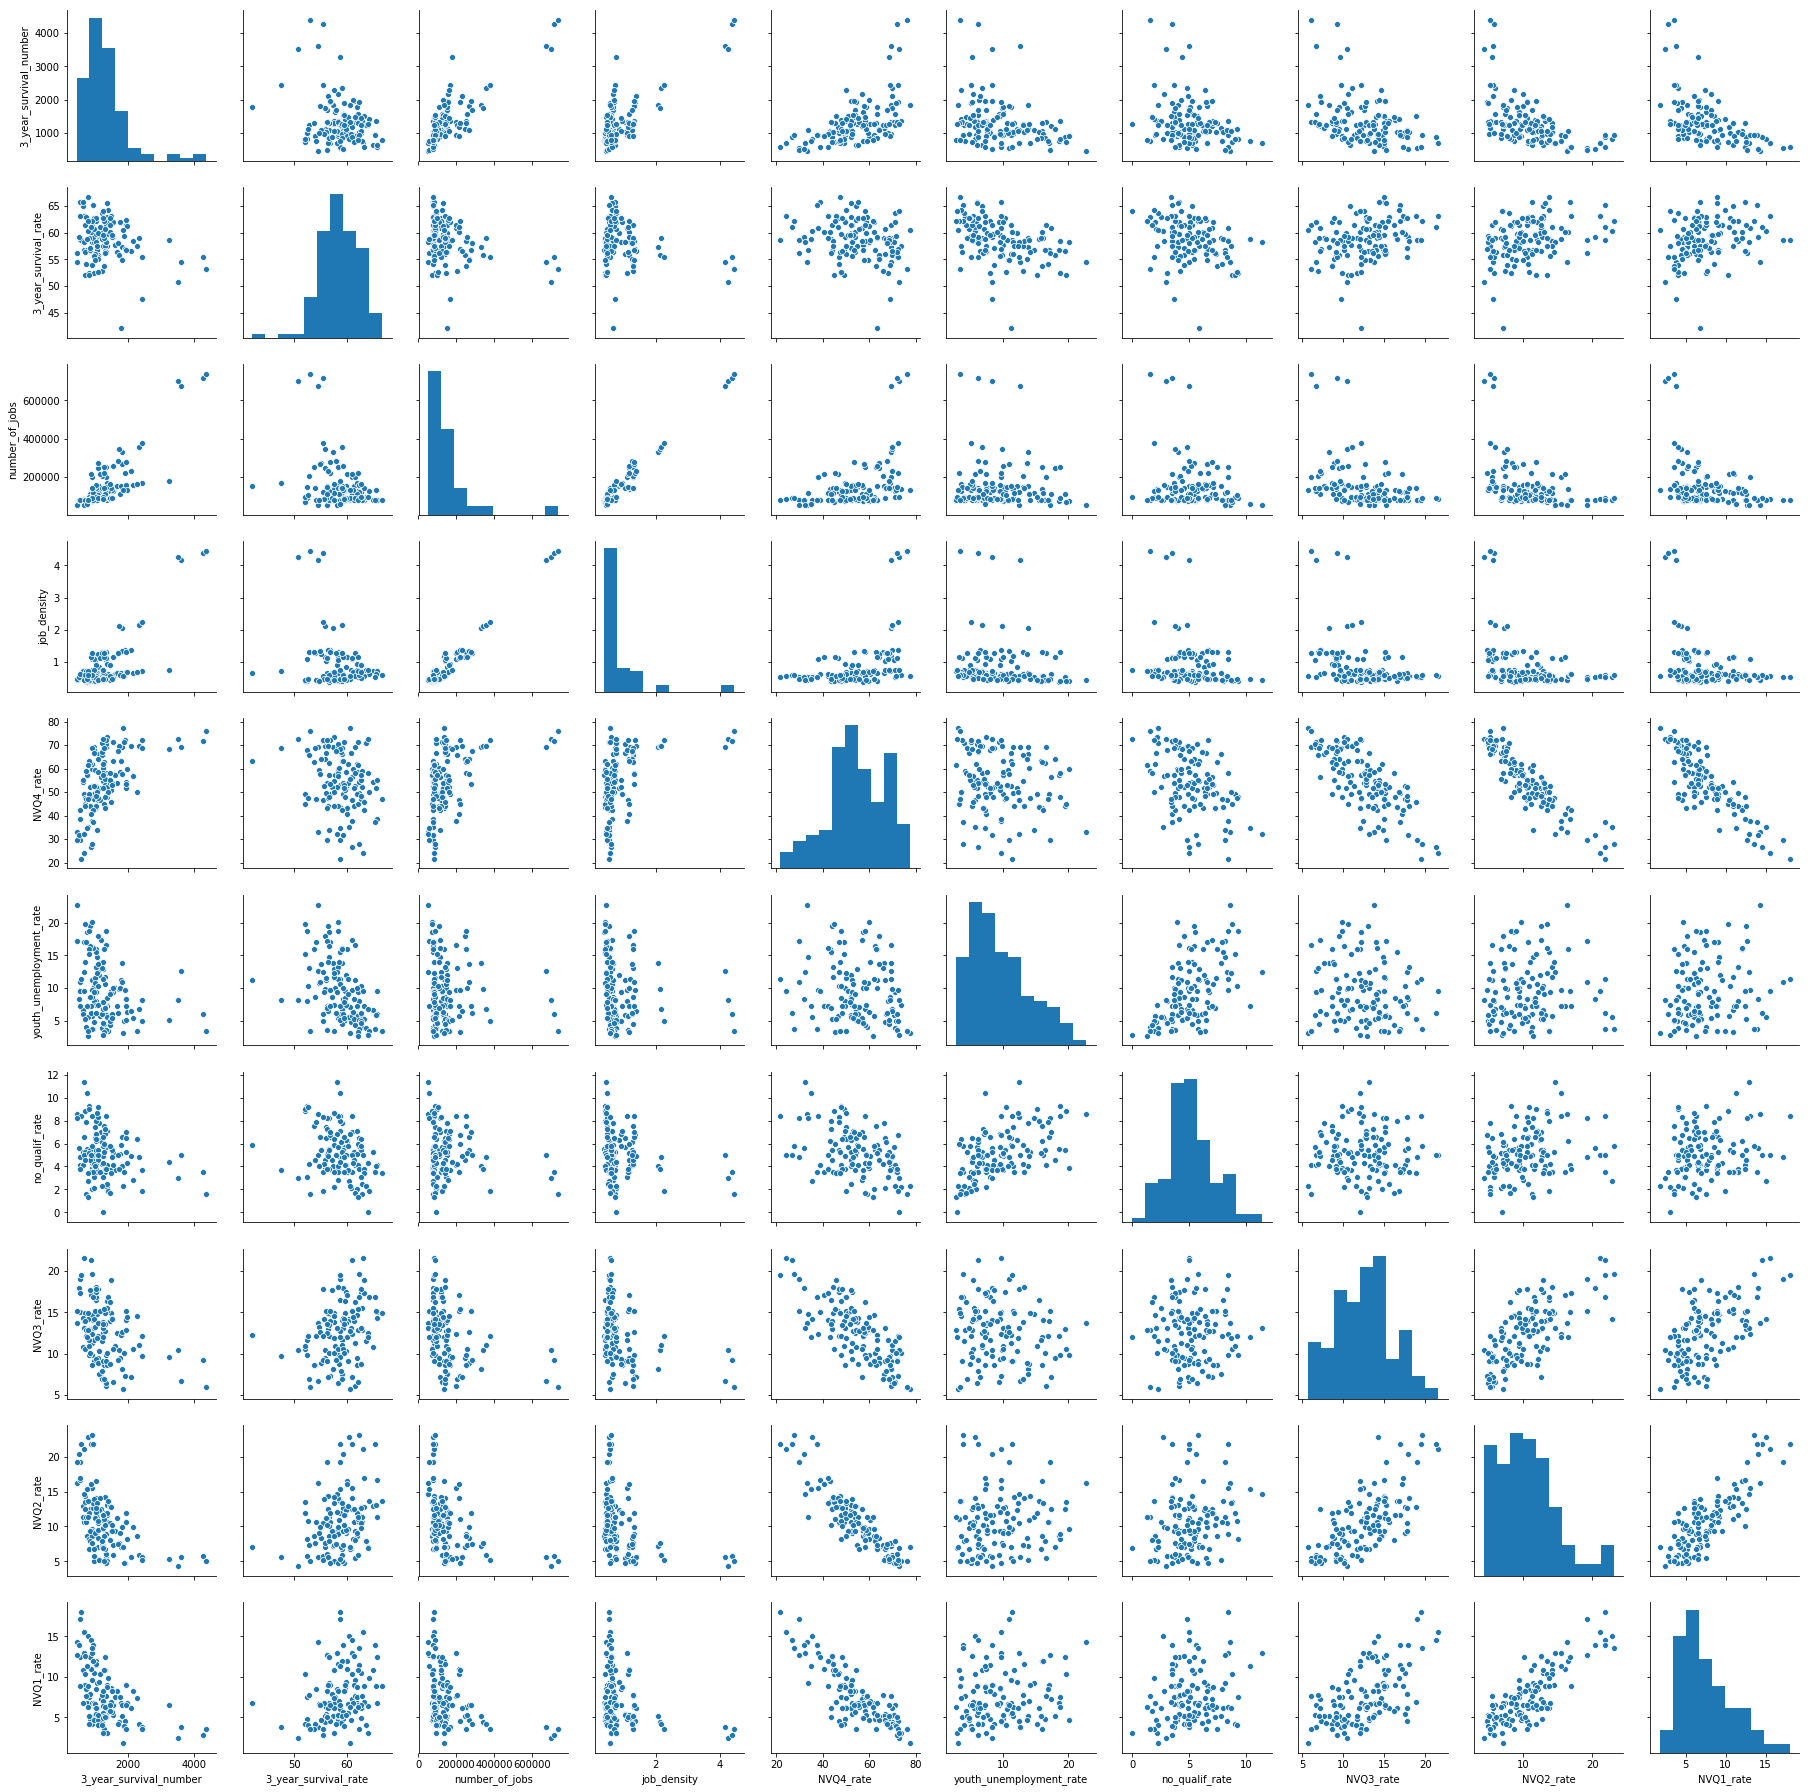

In [26]:
#1 is the relationship linear?
sns.pairplot(data=df)
## --> 3_year_survival_number, number_of_jobs, job_density might be not entirely linearly correlated, but mainly due to quite recognisable outliers

In [27]:
from sklearn.preprocessing import PolynomialFeatures 
   
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 
   
poly.fit(X_poly, y) 
X_poly = sm.add_constant(X_poly)
results = sm.OLS(y,X_poly).fit()
 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.323
Model:                                 OLS   Adj. R-squared:                  0.295
Method:                      Least Squares   F-statistic:                     11.64
Date:                     Tue, 14 Jan 2020   Prob (F-statistic):           3.29e-09
Time:                             12:06:55   Log-Likelihood:                -350.58
No. Observations:                      128   AIC:                             713.2
Df Residuals:                          122   BIC:                             730.3
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.2178     14.700     -1.443      0.151     -50.319       7.883
x1           -21.2178     14.700     -1.443      0.151     -50.319       7.883
x2             1.7679      0.746      2.371      0.019       0.292       3.244
x3           -10.6397      7.312     -1.455      0.148     -25.115       3.835
x4           -21.2178     14.700     -1.443      0.151     -50.319       7.883
x5             1.7679      0.746      2.371      0.019       0.292       3.244
x6           -10.6397      7.312     -1.455      0.148     -25.115       3.835
x7            -0.0380      0.013     -2.979      0.003      -0.063      -0.013
x8             0.2913      0.243      1.200      0.233      -0.189       0.772
x9             0.8392      0.480      1.747      0.083      -0.112       1.790
==============================================================================
Omnibus:                        5.951   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                6.135
Skew:                           0.522   Prob(JB):                       0.0465
Kurtosis:                       2.756   Cond. No.                     1.89e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.38e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
from sklearn.preprocessing import PolynomialFeatures 
   
poly = PolynomialFeatures(degree = 2) 
Z_poly = poly.fit_transform(Z) 
   
poly.fit(Z_poly, y) 
Z_poly = sm.add_constant(Z_poly)
results = sm.OLS(y,Z_poly).fit()
 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.295
Model:                                 OLS   Adj. R-squared:                  0.266
Method:                      Least Squares   F-statistic:                     10.21
Date:                     Tue, 14 Jan 2020   Prob (F-statistic):           3.47e-08
Time:                             12:06:55   Log-Likelihood:                -353.19
No. Observations:                      128   AIC:                             718.4
Df Residuals:                          122   BIC:                             735.5
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5274      3.891     -0.650      0.517     -10.230       5.176
x1            -2.5274      3.891     -0.650      0.517     -10.230       5.176
x2             0.1229      0.154      0.796      0.428      -0.183       0.429
x3             1.4447      0.967      1.493      0.138      -0.470       3.360
x4            -2.5274      3.891     -0.650      0.517     -10.230       5.176
x5             0.1229      0.154      0.796      0.428      -0.183       0.429
x6             1.4447      0.967      1.493      0.138      -0.470       3.360
x7            -0.0017      0.002     -0.736      0.463      -0.006       0.003
x8            -0.0102      0.022     -0.472      0.638      -0.053       0.033
x9            -0.1038      0.088     -1.176      0.242      -0.279       0.071
==============================================================================
Omnibus:                        6.429   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                6.191
Skew:                           0.534   Prob(JB):                       0.0453
Kurtosis:                       3.142   Cond. No.                     1.55e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.14e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
from sklearn.preprocessing import PolynomialFeatures 
   
poly = PolynomialFeatures(degree = 2) 
df_poly = poly.fit_transform(df_final) 
   
poly.fit(df_poly, y) 
df_poly = sm.add_constant(df_poly)
results = sm.OLS(y,df_poly).fit()
 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 1.388e+26
Date:                     Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                             12:06:55   Log-Likelihood:                 3369.6
No. Observations:                      128   AIC:                            -6697.
Df Residuals:                          107   BIC:                            -6637.
Df Model:                               20                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.705e-13   3.78e-11     -0.005      0.996    -7.5e-11    7.47e-11
x1             1.0000   7.78e-13   1.28e+12      0.000       1.000       1.000
x2          1.776e-15   8.91e-13      0.002      0.998   -1.76e-12    1.77e-12
x3          1.137e-13   5.47e-12      0.021      0.983   -1.07e-11     1.1e-11
x4         -1.155e-14   3.49e-13     -0.033      0.974   -7.04e-13    6.81e-13
x5          7.105e-15   1.97e-12      0.004      0.997   -3.89e-12    3.91e-12
x6         -2.151e-16   5.57e-15     -0.039      0.969   -1.13e-14    1.08e-14
x7          2.776e-16   1.11e-14      0.025      0.980   -2.17e-14    2.23e-14
x8         -7.772e-16   6.69e-14     -0.012      0.991   -1.33e-13    1.32e-13
x9         -1.214e-17   3.06e-15     -0.004      0.997   -6.08e-15    6.06e-15
x10         1.318e-16   1.87e-14      0.007      0.994    -3.7e-14    3.72e-14
x11         4.163e-17   5.29e-15      0.008      0.994   -1.04e-14    1.05e-14
x12         5.551e-16   7.93e-14      0.007      0.994   -1.57e-13    1.58e-13
x13        -1.527e-16   4.87e-15     -0.031      0.975   -9.82e-15    9.51e-15
x14         -1.11e-16   2.63e-14     -0.004      0.997   -5.22e-14     5.2e-14
x15                 0   1.75e-13          0      1.000   -3.47e-13    3.47e-13
x16        -4.163e-17    4.1e-14     -0.001      0.999   -8.13e-14    8.12e-14
x17                 0   2.07e-13          0      1.000    -4.1e-13     4.1e-13
x18         2.862e-17   7.41e-16      0.039      0.969   -1.44e-15     1.5e-15
x19         4.857e-17   8.07e-15      0.006      0.995    -1.6e-14    1.61e-14
x20        -3.886e-16   3.36e-14     -0.012      0.991    -6.7e-14    6.62e-14
==============================================================================
Omnibus:                        7.646   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.501
Skew:                          -0.586   Prob(JB):                       0.0235
Kurtosis:                       3.187   Cond. No.                     2.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
#2 is the Durbin-Watson-Test=2?
 #check the
model1.summary() #for (y,X) and (y,Z)
## --> the Durbin-Watson-Test is smaller than 2 for all model regressions, so there might be positive autocorrelation in residuals...

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.255
Model:                                 OLS   Adj. R-squared:                  0.243
Method:                      Least Squares   F-statistic:                     21.35
Date:                     Tue, 14 Jan 2020   Prob (F-statistic):           1.05e-08
Time:                             12:09:40   Log-Likelihood:                -356.75
No. Observations:                      128   AIC:                             719.5
Df Residuals:                          125   BIC:                             728.0
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   47.0709      5.879      8.007      0.000      35.436      58.706
3_year_survival_rate    -0.6136      0.098     -6.288      0.000      -0.807      -0.420
job_density             -1.7543      0.507     -3.460      0.001      -2.758      -0.751
==============================================================================
Omnibus:                        5.708   Durbin-Watson:                   1.185
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                5.729
Skew:                           0.517   Prob(JB):                       0.0570
Kurtosis:                       2.925   Cond. No.                         985.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Residuals')

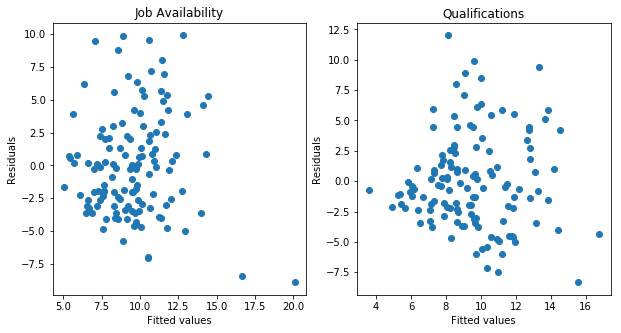

In [32]:
#3 Is there a funnel like shape?
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Job Availability")
plt.scatter(y_pred1, (y-y_pred1))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

plt.subplot(1,2,2)
plt.title("Qualifications")
plt.scatter(y_pred2, (y-y_pred2))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
#does not look much like a funnel like shape in both cases, but very dispersed residuals, maybe slight funnel shape in qualifications

Text(0.5, 1.0, 'Correlation in absolute values')

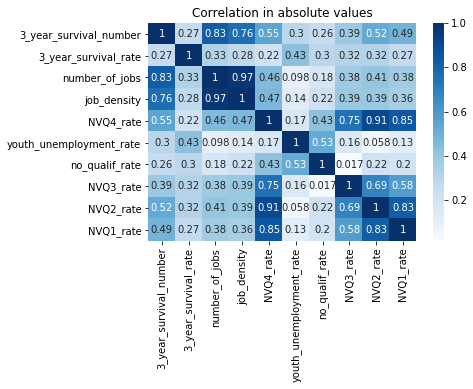

In [33]:
#4 Is one of the predictor variables highly correlated with another one?
p = sns.heatmap(df.corr().abs(),annot=True, cmap='Blues')
p.set_title('Correlation in absolute values')
#there is a high correlation btw. number of jobs and job density --> drop number of jobs (resolves also high correlation with survival rate of businesses)
#and btw. 3_year_survival_number and job density --> drop 3_year_survival_number
#and btw. NVQ3, NVQ2 and NVQ1 with NVQ4 --> drop NVQ3, NVQ2, NVQ1

Text(0.5, 0, 'Residuals')

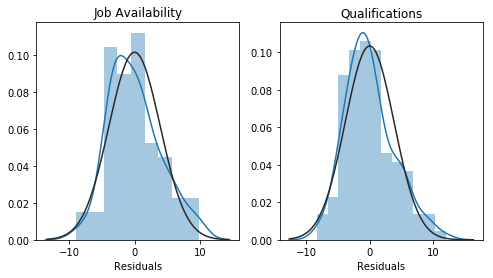

In [34]:
#5 Are the residuals normally distributed?
plt.subplots(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Job Availability")
sns.distplot(y-y_pred1 , fit=norm);
plt.xlabel('Residuals')

plt.subplot(1,2,2)
plt.title("Qualifications")
sns.distplot(y-y_pred2 , fit=norm);
plt.xlabel('Residuals')
#both slightly deviate from normal distribution, but maybe not too significantly?